In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# read in cycling data
df = pd.read_json('data/cycling.json')
df.head(2)

# build a version without the comments or day of the week
dfn = df.drop(columns=['Day of week', 'Notes'])

In [87]:
df.head()

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other,Day of week,Notes
2024-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7,NaN,Tuesday,
2024-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,NaN,Monday,
2024-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8,NaN,Thursday,
2024-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,NaN,Wednesday,
2024-01-19,NaN,NaN,NaN,NaN,11.1,NaN,NaN,NaN,NaN,Friday,Zwift


In [88]:
df.index.dtype

dtype('<M8[ns]')

In [89]:
last_day = df.index[0]
print(type(last_day))
last_day

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2024-01-30 00:00:00')

In [90]:
import datetime
import dateutil

#### Generating Day of the Week

We don't need to store the day of the week as we can generate it easily

In [91]:
df['dow'] = df.index.to_series().apply(lambda x: x.strftime('%A'))
df.head()

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other,Day of week,Notes,dow
2024-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.7,NaN,Tuesday,,Tuesday
2024-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,NaN,Monday,,Monday
2024-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8,NaN,Thursday,,Thursday
2024-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,NaN,Wednesday,,Wednesday
2024-01-19,NaN,NaN,NaN,NaN,11.1,NaN,NaN,NaN,NaN,Friday,Zwift,Friday


In [92]:
print(f"There are {len(df[df['Day of week'] != df.dow])} days with the wrong day of the week out of {len(df)}")

There are 35 days with the wrong day of the week out of 2005


### Generating a series of days

In [93]:
earliest = df.index.min()
earliest
latest = df.index.max()
latest

Timestamp('2024-01-30 00:00:00')

In [94]:
earliest + pd.to_timedelta(np.arange(30), 'D')

DatetimeIndex(['2011-03-14', '2011-03-15', '2011-03-16', '2011-03-17',
               '2011-03-18', '2011-03-19', '2011-03-20', '2011-03-21',
               '2011-03-22', '2011-03-23', '2011-03-24', '2011-03-25',
               '2011-03-26', '2011-03-27', '2011-03-28', '2011-03-29',
               '2011-03-30', '2011-03-31', '2011-04-01', '2011-04-02',
               '2011-04-03', '2011-04-04', '2011-04-05', '2011-04-06',
               '2011-04-07', '2011-04-08', '2011-04-09', '2011-04-10',
               '2011-04-11', '2011-04-12'],
              dtype='datetime64[ns]', freq=None)

In [95]:
latest - earliest

Timedelta('4705 days 00:00:00')

### Selecting by date ranges

In [102]:
df.loc['2012'].head()

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other,Day of week,Notes,dow
2012-12-31,NaN,NaN,NaN,NaN,NaN,11.3,NaN,NaN,NaN,Monday,,Monday
2012-12-30,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,,Sunday
2012-12-27,NaN,NaN,NaN,NaN,NaN,13.2,NaN,NaN,NaN,Thursday,,Thursday
2012-12-24,NaN,NaN,NaN,NaN,NaN,16.8,NaN,NaN,NaN,Monday,,Monday
2012-12-18,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,Tuesday,,Tuesday


In [103]:
# can specify a range BUT indexing keys must exist
df.loc['2012-12-18':'2012-12-31']

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other,Day of week,Notes,dow
2012-12-31,NaN,NaN,NaN,NaN,NaN,11.3,NaN,NaN,NaN,Monday,,Monday
2012-12-30,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,,Sunday
2012-12-27,NaN,NaN,NaN,NaN,NaN,13.2,NaN,NaN,NaN,Thursday,,Thursday
2012-12-24,NaN,NaN,NaN,NaN,NaN,16.8,NaN,NaN,NaN,Monday,,Monday
2012-12-18,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,Tuesday,,Tuesday


In [110]:
# selecting a month and year
df[(df.index.year == 2012) & (df.index.month == 12)]

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other,Day of week,Notes,dow
2012-12-31,NaN,NaN,NaN,NaN,NaN,11.3,NaN,NaN,NaN,Monday,,Monday
2012-12-30,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,,Sunday
2012-12-27,NaN,NaN,NaN,NaN,NaN,13.2,NaN,NaN,NaN,Thursday,,Thursday
2012-12-24,NaN,NaN,NaN,NaN,NaN,16.8,NaN,NaN,NaN,Monday,,Monday
2012-12-18,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,Tuesday,,Tuesday
2012-12-08,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,Saturday,,Saturday


In [114]:
# generate a set of dates and then select the rows in that range of dates
days_in_december = pd.date_range('2012-12-01', periods=31)
df[df.index.isin(days_in_december)]

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other,Day of week,Notes,dow
2012-12-31,NaN,NaN,NaN,NaN,NaN,11.3,NaN,NaN,NaN,Monday,,Monday
2012-12-30,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,,Sunday
2012-12-27,NaN,NaN,NaN,NaN,NaN,13.2,NaN,NaN,NaN,Thursday,,Thursday
2012-12-24,NaN,NaN,NaN,NaN,NaN,16.8,NaN,NaN,NaN,Monday,,Monday
2012-12-18,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,Tuesday,,Tuesday
2012-12-08,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,Saturday,,Saturday


In [115]:
# the periods generated don't have to be daily
pd.period_range('2012-01-01', periods=12, freq='M')

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12'],
            dtype='period[M]')

### Resampling (grouping) by time period

Resampling is essentially grouping to a time period such as days, weeks, months or years.

In [117]:
dfn.resample('M').sum()

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other
2011-03-31,0.0,63.8,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2011-04-30,0.0,39.2,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2011-05-31,0.0,9.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2011-06-30,0.0,125.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2011-07-31,0.0,74.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2023-09-30,0.0,0.0,0.0,12.3,0.0,0.0,15.60,0.0,53.0
2023-10-31,0.0,0.0,0.0,34.7,52.8,0.0,230.91,10.0,0.0
2023-11-30,0.0,0.0,0.0,0.0,58.7,0.0,168.40,0.0,0.0
2023-12-31,0.0,0.0,0.0,12.1,0.0,0.0,73.20,0.0,0.0


Compute the average lenght of a bike ride for each bike in each year

In [120]:
dfn.resample('Y').mean()

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other
2011-12-31,NaN,12.709804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31,NaN,13.700000,NaN,NaN,NaN,14.012821,NaN,NaN,12.400000
2013-12-31,NaN,10.273333,NaN,NaN,NaN,14.163768,NaN,NaN,25.600000
2014-12-31,9.457143,13.115385,NaN,NaN,NaN,15.871094,NaN,NaN,12.185714
2015-12-31,11.590625,7.475000,14.255435,NaN,NaN,15.344000,NaN,NaN,5.250000
2016-12-31,13.533333,NaN,14.088750,14.669231,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,12.581333,15.496907,NaN,NaN,NaN,14.740000
2018-12-31,NaN,NaN,NaN,11.863043,17.351786,NaN,18.183333,NaN,10.900000
2019-12-31,NaN,NaN,NaN,12.679167,13.369744,NaN,16.892784,NaN,NaN
2020-12-31,NaN,NaN,NaN,12.603226,14.434375,NaN,15.860417,NaN,11.333333


<Axes: >

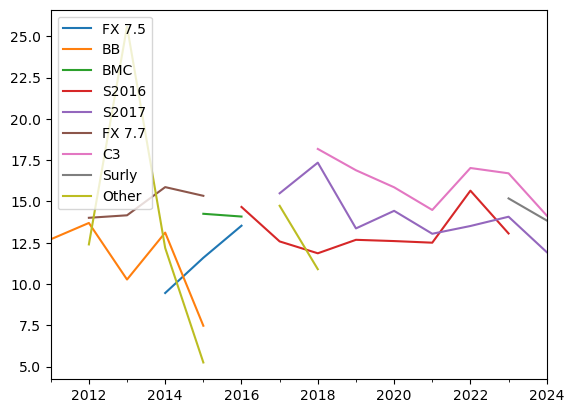

In [121]:
dfn.resample('Y').mean().plot()

Groupby can also be used with specific keywords like 'dayofweek'

In [126]:
x = dfn.groupby(dfn.index.dayofweek).mean()
x.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
x

,FX 7.5,BB,BMC,S2016,S2017,FX 7.7,C3,Surly,Other
Mon,12.876190,13.674074,14.755172,13.335714,13.960526,14.748000,15.977143,15.466667,10.650000
Tues,11.592857,11.723810,13.757692,13.434328,15.300000,14.725862,16.072308,13.633333,12.885714
Wed,12.736842,11.050000,14.421739,12.708475,14.748148,14.997826,16.154412,12.460000,11.566667
Thurs,11.623529,13.437500,14.972222,13.880769,14.584828,14.259649,16.468652,20.100000,11.180000
Fri,13.562500,12.992308,14.615152,14.023913,15.057736,15.844898,17.682039,10.750000,9.542857
Sat,11.010000,13.154545,12.860000,13.731034,16.092857,15.433333,16.748333,16.250000,14.100000
Sun,11.452632,13.142105,13.578261,12.745763,14.890000,14.700000,15.457143,19.700000,15.450000
